In [1]:

import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
def get_df(drop_species=True):
    df = pd.read_csv("Iris.csv", header=0)
    if drop_species:
        df = df.drop('Species', axis=1)
    df = df.drop('Id', axis=1)
    return df

In [3]:
df = get_df()
display(df.head(5))
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


upravy df

In [4]:
df['LogPetalLength'] = df['PetalLengthCm'].apply(lambda x: np.log(x))

# Add a new column for the squared values of 'Log_PetalLength'
df['LogPetalLengthSquared'] = df['LogPetalLength'] ** 2

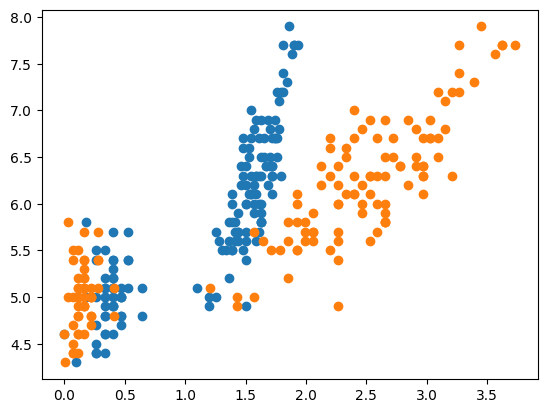

In [5]:
#graf vztahu x a y
plt.scatter(df['LogPetalLength'], df['SepalLengthCm'])
plt.scatter(df['LogPetalLengthSquared'], df['SepalLengthCm'])

Linearni model a kvadraticky model(plynominal regression)

In [6]:
x = df[['LogPetalLength', 'LogPetalLengthSquared']]
y = df["SepalLengthCm"]

x = sm.add_constant(x)

lin_model = sm.OLS(y,x[['LogPetalLength', 'const']],missing="raise")
lin_model_fit = lin_model.fit()
print(lin_model_fit.summary())



quad_model = sm.OLS(y,x[['LogPetalLengthSquared', 'LogPetalLength', "const"]])
quad_model_fit = quad_model.fit()
print(quad_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     317.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.12e-38
Time:                        10:57:02   Log-Likelihood:                -98.043
No. Observations:                 150   AIC:                             200.1
Df Residuals:                     148   BIC:                             206.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
LogPetalLength     1.1603      0.065     17.

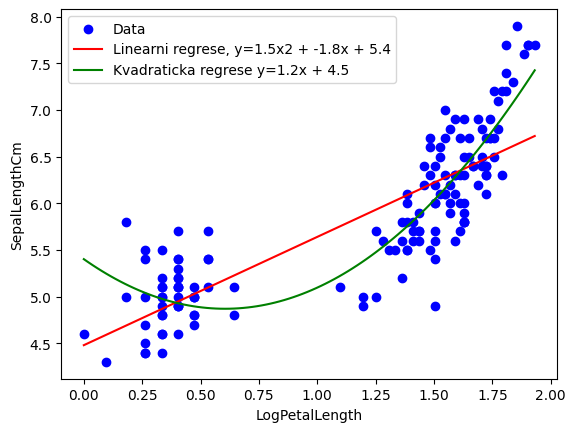


LINEARNI REGRESE

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     317.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.12e-38
Time:                        11:01:17   Log-Likelihood:                -98.043
No. Observations:                 150   AIC:                             200.1
Df Residuals:                     148   BIC:                             206.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
LogPetalLength     1.1603

In [9]:

#>> rovnice
lin_slope, lin_intercept = lin_model_fit.params
x2_slope, x_slope, quad_intercept = quad_model_fit.params

#>> grafy
plt.scatter(df['LogPetalLength'], df['SepalLengthCm'], label='Data', color='b')

x_range = np.linspace(df['LogPetalLength'].min(), df['LogPetalLength'].max(), 100)

linear_x_range = sm.add_constant(np.column_stack((x_range, np.ones_like(x_range))))
linear_y_pred = lin_model_fit.predict(linear_x_range)
quad_x_range = sm.add_constant(np.column_stack((x_range**2, x_range, np.ones_like(x_range))))
quad_y_pred = quad_model_fit.predict(quad_x_range)

plt.plot(x_range, linear_y_pred, label=f'Linearni regrese, y={x2_slope:.1f}x2 + {x_slope:.1f}x + {quad_intercept:.1f}', color='r')
plt.plot(x_range, quad_y_pred, label=f'Kvadraticka regrese y={lin_slope:.1f}x + {lin_intercept:.1f}', color='g')

plt.xlabel('LogPetalLength')
plt.ylabel('SepalLengthCm')
plt.legend()


plt.show()
print("\nLINEARNI REGRESE\n")
print(lin_model_fit.summary())

print("\nKVADRATICKA REGRESE\n")
print(quad_model_fit.summary())